#### Assignment 5: Geographic Data Analysis

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots, a choropleth map and a proportional symbol map. In addition to these two plots, you will compute the value of Moran's I for this data.

#### Dataset

The dataset to be used in this assignment is a dataset containing Per Capita incomes for the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use
to create the choropleth and proportional symbol maps.

#### Administrative Notes

This assignment will be graded by Coursera's grading system. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly. Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed.

In [1]:
import pysal
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


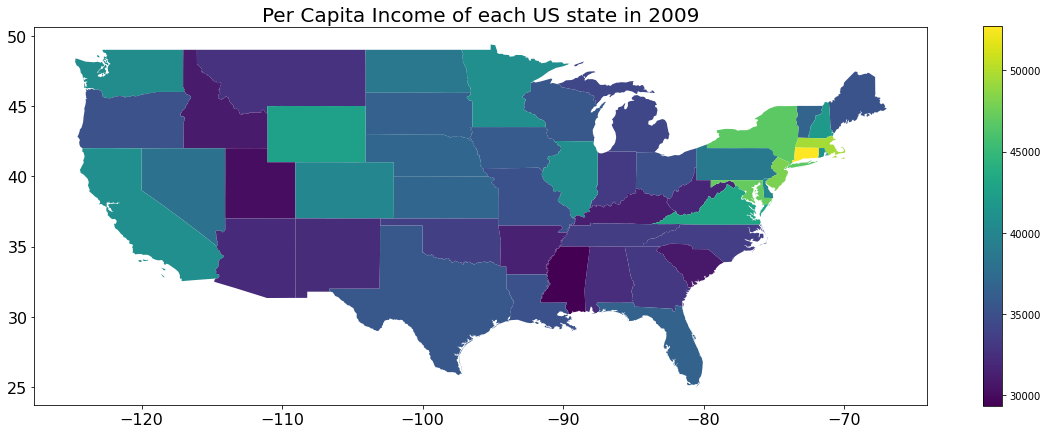

In [2]:
# Graded Cell, PartID: CkcsR
# Part 1: Using the PySal Data, create a choropleth path of the United States
# that depicts the per capita income of each US state in 2009.
# Notes: The PySal and GeoPandas libraries both contain utility functions that
# may make this task easier.


# Read the datasets.
us_income = pd.read_csv(pysal.examples.get_path('usjoin.csv'))
us_income_shape = gpd.read_file(pysal.examples.get_path('us48.shx'))

# Merge the datasets in one frame.
df = pd.merge(left=us_income_shape, right=us_income, left_on="STATE_NAME", right_on="Name")

# Plot per capita income for the year 2009 as a choropleth map.
df.plot('2009', figsize=(20, 7), legend = True)
plt.title('Per Capita Income of each US state in 2009', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot in the Jupyter Notebook.
plt.show()

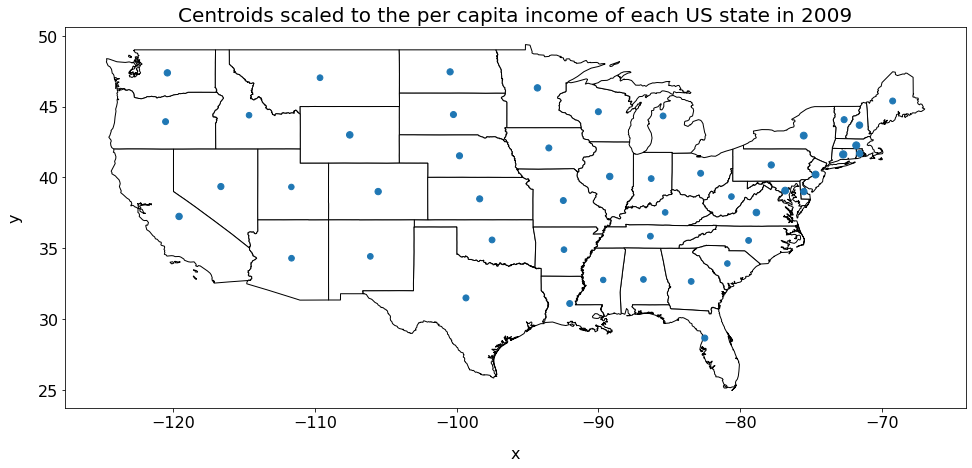

In [3]:
# Graded Cell, PartID: FqNRm
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.


# Read the datasets.
us_income = pd.read_csv(pysal.examples.get_path('usjoin.csv'))
us_income_shape = gpd.read_file(pysal.examples.get_path('us48.shx'))

# Merge the datasets in one frame.
df = pd.merge(left=us_income_shape, right=us_income, left_on="STATE_NAME", right_on="Name")

# Compute the centroid of each state from its shape file.
us_income_shape['centroid_column'] = us_income_shape.centroid

# Construct a dataframe with the XY coordinates of each centroid and the per capita income of 2009.
centroids = list(us_income_shape['centroid_column'])
_df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))], 'x':[centroids[i].x for i in range(len(centroids))], 'data':list(df['2009'])})

# Create a base plot showing the outlines of each country on the map.
base = us_income_shape.plot(color='white', edgecolor='black', figsize=(20, 7))

# Annotate the base plot with circles scaled to the size of the data.
_df.plot(kind='scatter', x='x', y='y', s=_df['data']*0.001, ax=base)

plt.title('Centroids scaled to the per capita income of each US state in 2009', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('x', fontsize=16, labelpad=16)
plt.ylabel('y', fontsize=16, labelpad=16)

# Show the plot in the notebook.
plt.show()


In [4]:
# Graded Cell, PartID: CtQYv
# Part 3: Using the same data, compute the value of Moran's I for the per 
# capita income of each US state in 2009 using Rook Continuity. Report the 
# value of I rounded to 4 decimal places (i.e. x.XXXX)
# Notes: Again, the PySal and GeoPandas libraries may contain useful utility
# functions.


us_income = pd.read_csv(pysal.examples.get_path('usjoin.csv'))

# Select the single column of interest from the dataset.
y = us_income.filter(['2009'])

# Load the Rook continuity matrix for use in Moran's I computation.
w = pysal.weights.rook_from_shapefile(pysal.examples.get_path('us48.shx'))

# Compute Moran's I for the data.
mi = pysal.Moran(y, w, two_tailed=False)

# Report that value of Moran's I, the value is rounded to 4 decimal places.
print(round(mi.I, 4))

0.0407
